<a href="https://colab.research.google.com/github/janet12041/RPAA/blob/main/RPAA_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 5: Métodos Paramétricos

##Janet Illescas Coria

Realiza un análisis de regresión polinomial para aproximar la función de
densidad de probabilidad de una distribución de Rayleigh. Primero generarás una
muestra aleatoria de esta distribución, utilizando un parámetro dado.
Posteriormente, determinaremos el grado del polinomio (lo que equivale a ajustar
la complejidad del modelo) que mejor explica a los datos, debes considerar la
relación entre el sesgo y la varianza de los modelos en el conjunto de entrenamiento.
Finalmente, utilizarás el estimador máximo verosómil y compararás el mejor modelo polinomial
con la distribuci ́on utilizando dicho estimador. Tu análisis deberá incluir los siguientes puntos,
aunque no se limita únicamente a ellos.

1. Generar una muestra aleatoria de 10, 000 puntos de la distribución de Rayleigh utilizando
scale = 7.53





In [1]:
import numpy as np

np.random.seed(0)
scale = 7.53
n = 10000
rayleigh_data = np.random.rayleigh(scale, n)

2. Obtén 160 puntos del histograma de tu muestra.

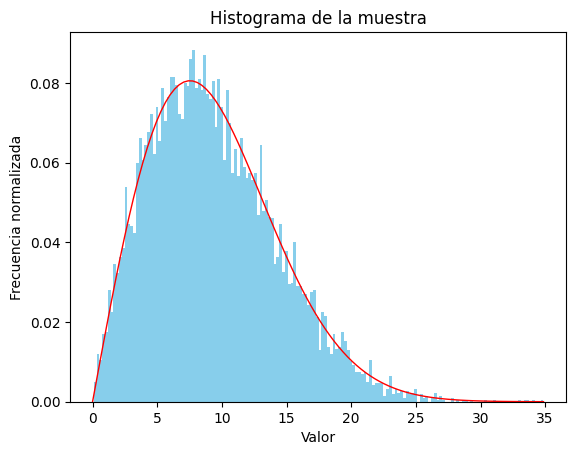

In [2]:
import matplotlib.pyplot as plt

nbins = 160

# Función de densidad de Rayleigh
x = np.linspace(0, max(rayleigh_data), 100)
pdf = (x /scale **2) * np.exp(-x**2 / (2 * scale**2))
plt.plot(x, pdf, 'r', linewidth=1)

# Histograma
plt.hist(rayleigh_data, bins=nbins, density=True, color='skyblue')
plt.xlabel('Valor')
plt.ylabel('Frecuencia normalizada')
plt.title('Histograma de la muestra')

# Puntos para entrenamiento
hist, bin_edges = np.histogram(rayleigh_data, bins=nbins, density=True)
#plt.scatter(bin_edges[:-1], hist)

plt.show()

3. Divide los puntos en conjunto de entrenamiento y prueba (80-20).

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bin_edges[:-1].reshape(-1, 1), hist, test_size=0.2, random_state=0)

4. Realiza una regresión polinomial del conjunto de entrenamiento probando distintos grados
de polinomio. Calcula el sesgo y varianza para cada grado utilizado (Es posible que tengas que dividir tu conjunto de entrenamiento en entrenamiento y validación). Imprime los resultados en un dataframe de pandas: grado del polinomio, sesgo, varianza, MAE, MSE, R^2

In [4]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Grados del polinomio
grados = [1, 2, 3, 4, 5]

# Lista para almacenar los resultados
resultados = []

for grado in grados:
    # Características polinomiales
    polynomial_features = PolynomialFeatures(degree=grado)
    x_train_polinom = polynomial_features.fit_transform(x_train.reshape(-1, 1))
    x_test_polinom = polynomial_features.transform(x_test.reshape(-1, 1))

    # Entrenameitno del modelo de regresión lineal
    model = LinearRegression()
    model.fit(x_train_polinom, y_train)

    # Prediccion
    y_pred = model.predict(x_test_polinom)

    # Calcular metricas
    sesgo = np.mean((y_pred - y_test) ** 2)
    varianza = np.var(y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Almacenar los resultados en el DataFrame
    resultados.append([grado, sesgo, varianza, mae, mse, r2])

# Imprimir los resultados
columnas = ['Grado', 'Sesgo', 'Varianza', 'MAE', 'MSE', 'R^2']
resultados_df = pd.DataFrame(resultados, columns=columnas)
print(resultados_df)

   Grado     Sesgo  Varianza       MAE       MSE       R^2
0      1  0.000307  0.000395  0.014608  0.000307  0.671644
1      2  0.000298  0.000404  0.014906  0.000298  0.681096
2      3  0.000074  0.000860  0.007514  0.000074  0.921385
3      4  0.000016  0.000837  0.002842  0.000016  0.982571
4      5  0.000016  0.000834  0.002752  0.000016  0.982586


5. Repite el análisis del punto 4 pero utilizando regularización y validación cruzada.

In [5]:
from sklearn.linear_model import RidgeCV

# Grados de polinomio
grados = [1, 2, 3, 4, 5]

# Alphas a usar
alphas = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 10]

# Lista para almacenar los resultados
resultados = []

for grado in grados:

    # Características polinomiales
    polynomial_features = PolynomialFeatures(degree=grado)
    x_train_polinom = polynomial_features.fit_transform(x_train.reshape(-1, 1))
    x_test_polinom = polynomial_features.transform(x_test.reshape(-1, 1))

    # Entrenameitno del modelo de regresión lineal
    model = RidgeCV(alphas=alphas)
    model.fit(x_train_polinom, y_train)

    # Prediccion
    y_pred = model.predict(x_test_polinom)

    # Calcular metricas
    sesgo = np.mean((y_pred - y_test) ** 2)
    varianza = np.var(y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Almacenar los resultados en el DataFrame
    resultados.append([grado, sesgo, varianza, mae, mse, r2])

# Imprimir los resultados
columnas = ['Grado', 'Sesgo', 'Varianza', 'MAE', 'MSE', 'R^2']
resultados_reg_df = pd.DataFrame(resultados, columns=columnas)
print("Con regulación y validación cruzada")
print(resultados_reg_df)

Con regulación y validación cruzada
   Grado     Sesgo  Varianza       MAE       MSE         R^2
0      1  0.000307  0.000394  0.014613  0.000307    0.671462
1      2  0.000298  0.000404  0.014911  0.000298    0.681023
2      3  0.000073  0.000860  0.007510  0.000073    0.921408
3      4  0.000017  0.000834  0.002846  0.000017    0.982308
4      5  0.328259  0.346899  0.479713  0.328259 -350.018679


6. Presenta tu mejor modelo polinomial y argumenta por qué es el mejor.

In [6]:
# Ordenar el modelo de regresion polinomial por el mejor resultado en R^2
resultados_sorted = resultados_df.sort_values(by='R^2', ascending=False)
print("Modelos de regresión polinomial")
print(resultados_sorted)

# Ordenar el DataFrame por la mejor métrica (en este caso, R^2)
resultados_reg_sorted = resultados_reg_df.sort_values(by='R^2', ascending=False)
print("Modelos con regularizacion y validacion cruzada")
print(resultados_reg_sorted)

Modelos de regresión polinomial
   Grado     Sesgo  Varianza       MAE       MSE       R^2
4      5  0.000016  0.000834  0.002752  0.000016  0.982586
3      4  0.000016  0.000837  0.002842  0.000016  0.982571
2      3  0.000074  0.000860  0.007514  0.000074  0.921385
1      2  0.000298  0.000404  0.014906  0.000298  0.681096
0      1  0.000307  0.000395  0.014608  0.000307  0.671644
Modelos con regularizacion y validacion cruzada
   Grado     Sesgo  Varianza       MAE       MSE         R^2
3      4  0.000017  0.000834  0.002846  0.000017    0.982308
2      3  0.000073  0.000860  0.007510  0.000073    0.921408
1      2  0.000298  0.000404  0.014911  0.000298    0.681023
0      1  0.000307  0.000394  0.014613  0.000307    0.671462
4      5  0.328259  0.346899  0.479713  0.328259 -350.018679


In [7]:
best_i = resultados_reg_df['R^2'].idxmax()
print("Mejor modelo polinomial: grado", resultados_reg_df.loc[best_i, 'Grado'])
print("R^2: ", resultados_reg_df.loc[best_i, 'R^2'])

Mejor modelo polinomial: grado 4
R^2:  0.9823082155769229


Notamos que sin la regularización y validación cruzada, el modelo de grado 5 parece ser el mejor debido a sus resultados, aunque no difiere mucho del de grado 4, ambos tienen un MSE muy bajo y un R^2 muy alto, es decir,  su ajuste a los datos es muy bueno.

Aunque hay que considerar que estos pueden estar sobreajustados, por lo que podría evaluarse su rendimiento en datos de prueba independientes para confirmar que generalizan bien.

Por otro lado, con la regularización y validación cruzada, notamos que el grado 5 presenta sobreajuste y un rendimiento deficiente.

Por lo tanto, de acuerdo a estos resultados el mejor modelo es el de regresión polinomial de grado 4.

7. Finalmente utiliza la distribución de Rayleigh utilizando el estimador máximo verosímil:
scale = MLE y compáralo con el modelo polinomial presentado en el punto 6, probando
su rendimiento en el conjunto de prueba.

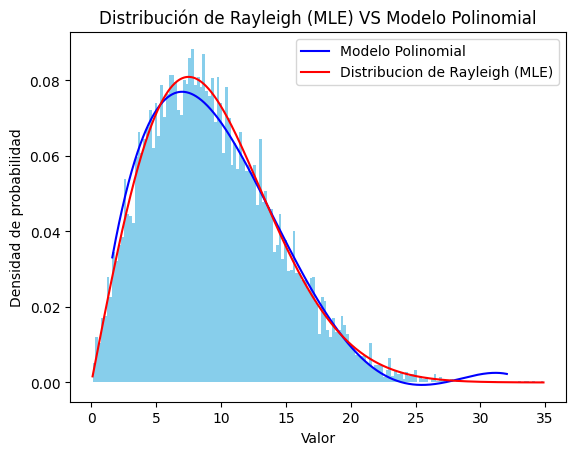

In [16]:
from scipy.stats import rayleigh

# Ajustar la distribución de Rayleigh a los datos de entrenamiento con el
# estimador de máxima verosimilitud (MLE)
mle = np.sqrt(np.mean(rayleigh_data ** 2) / 2)
rayleigh_mle_data = np.random.rayleigh(scale=mle, size=len(y_test))

# Histograma de datos original
plt.hist(rayleigh_data, bins=nbins, density=True, color='skyblue')
hist, bin_edges = np.histogram(rayleigh_data, bins=nbins, density=True)

# Mejor modelo polinomial
best_polynomial_features = PolynomialFeatures(degree=4)
best_x_train_polinom = best_polynomial_features.fit_transform(x_train.reshape(-1, 1))

best_model = LinearRegression()
best_model.fit(best_x_train_polinom, y_train)

# Valores para las líneas del modelo polinomial
x_values = np.linspace(min(x_test), max(x_test), 1000).reshape(-1, 1)
x_polinomial_values = best_polynomial_features.transform(x_values)
y_polinomial_predict = best_model.predict(x_polinomial_values)
plt.plot(x_values, y_polinomial_predict, label="Modelo Polinomial", color='blue')

# Valores para las líneas de la Distribucion de Rayleigh
x_values_r = np.linspace(min(bin_edges), max(bin_edges), 1000)
pdf_values = rayleigh.pdf(x_values_r, scale=mle)
plt.plot(x_values_r, pdf_values, label="Distribucion de Rayleigh (MLE)", color='red')

plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de Rayleigh (MLE) VS Modelo Polinomial')
plt.legend()
plt.show()


Como podemos notar nuestro modelo polinomial se acerca bastante a la Distribución de Rayleigh, la cual se ajusta de manera más precisa a los datos originales. Observamos que la mayor diferencia entre ambos esta dada en aquellos valores con mayor densidad de probabilidad.

Con lo anterior podemos deducir que nuestro modelo polinomial presenta un buen ajuste, bastante pròximo a la distribución de Rayleigh.